In [107]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
import statsmodels as sm
import scikitplot as skplt
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [25]:
#import file and read csv data
loan=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\loan_prediction.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
#check null values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
#fill all missing values
loan['Gender']=loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married']=loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents']=loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed']=loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0])
loan['Credit_History']=loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])

In [28]:
#describe data to see mean medain mode and max min of numerical data
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


1.Applicantincome shows huge standard deviation, Coapplicatntincome also show high std.

In [29]:
#check more insight of data 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
#unique values count 
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [31]:
#drop Loan_ID column nominal data
data=loan.drop(columns='Loan_ID',axis=1)

In [32]:
#unqiue value print
print('Gender:',data.Gender.unique())
print('Married:',data.Married.unique())
print('Dependents:',data.Dependents.unique())
print('Education:', data.Education.unique())
print('Self_Employed:', data.Self_Employed.unique())
print('Property_Area:',data.Property_Area.unique())
print('Loan_Status:',data.Loan_Status.unique())

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [33]:
#so now convert all object data in numerical value with encoding 
from sklearn.preprocessing import OrdinalEncoder

In [34]:
oe=OrdinalEncoder()

In [35]:
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=oe.fit_transform(data)
    

In [36]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,1.0,1.0,1.0,5849,0.0,146.412162,360.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,4583,1508.0,128.000000,360.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,3000,0.0,66.000000,360.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,2583,2358.0,120.000000,360.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,6000,0.0,141.000000,360.0,1.0,1.0,1.0


In [37]:
data.shape

(614, 12)

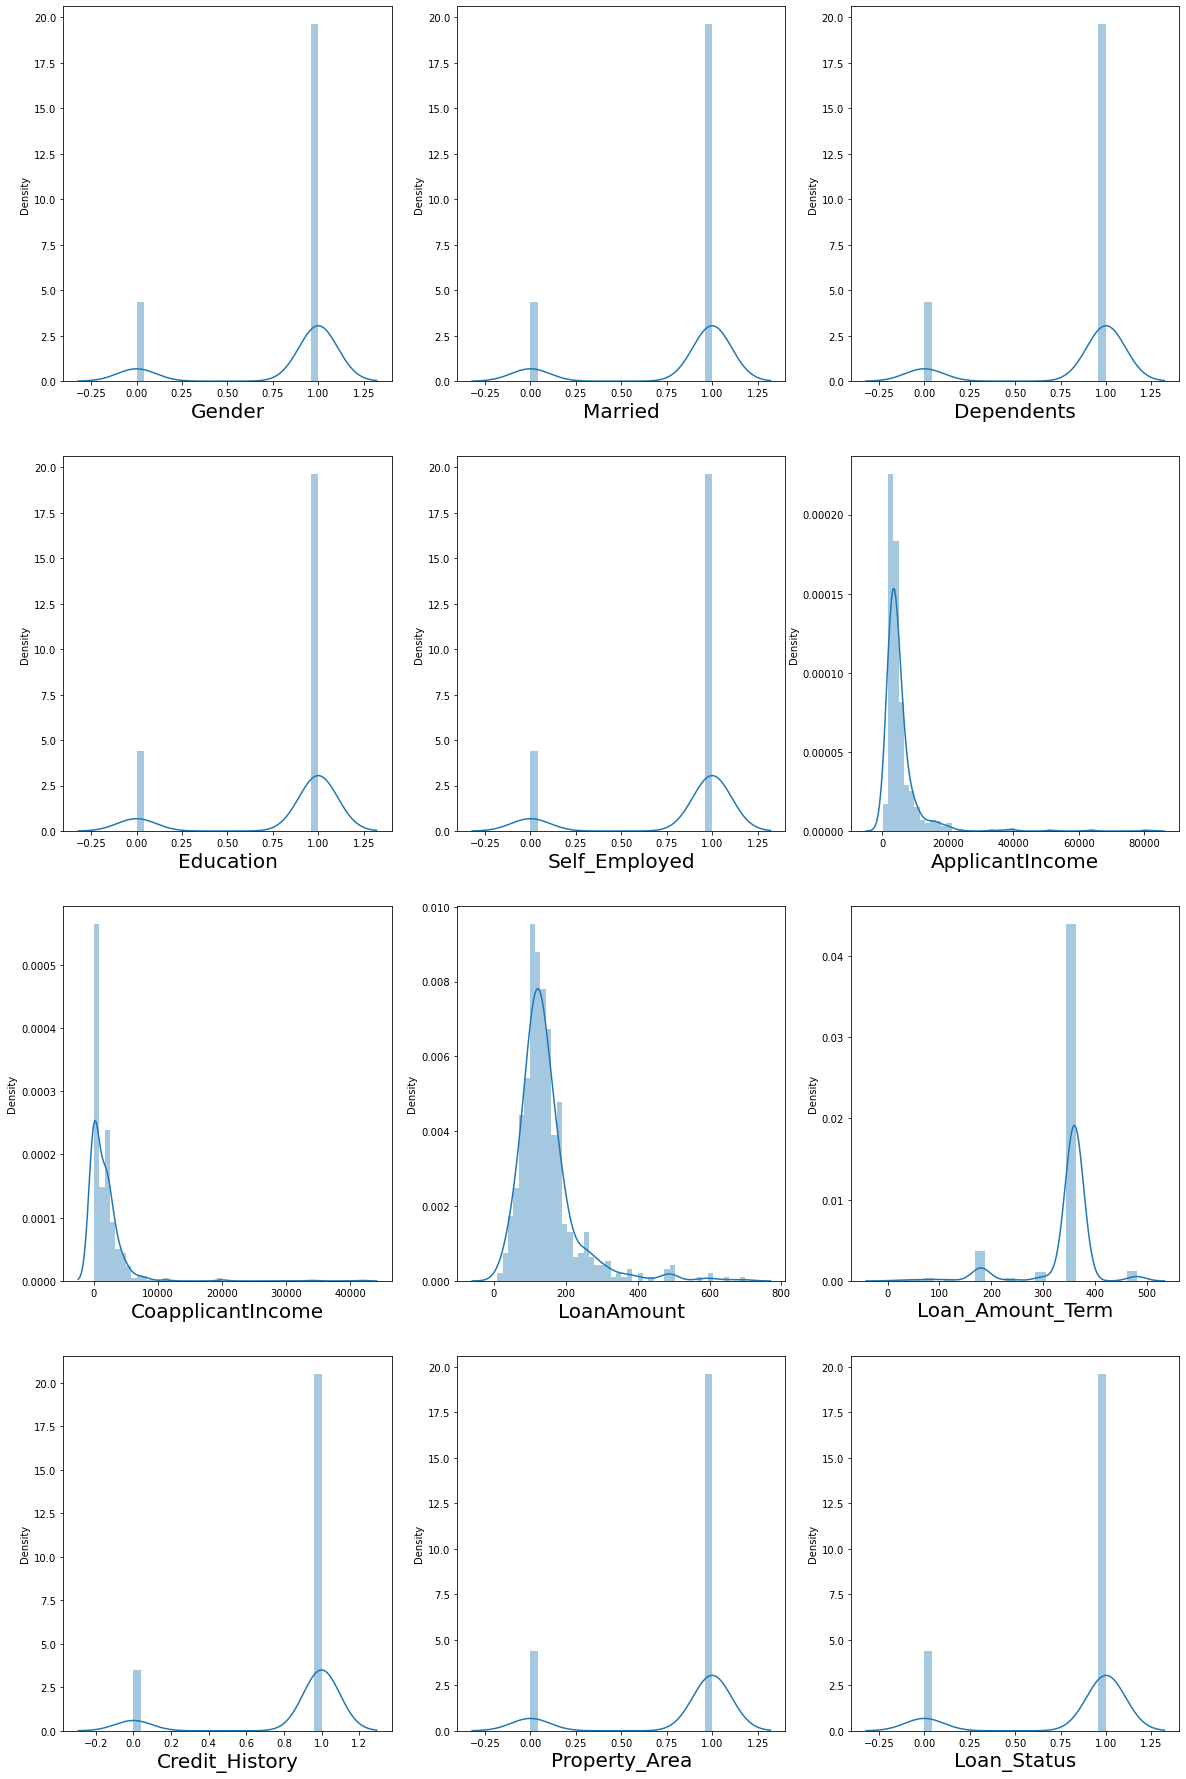

In [38]:
#Visualization of data distribution 

plt.figure(figsize=(20,40))
plotnumber=1
for column in data:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()  

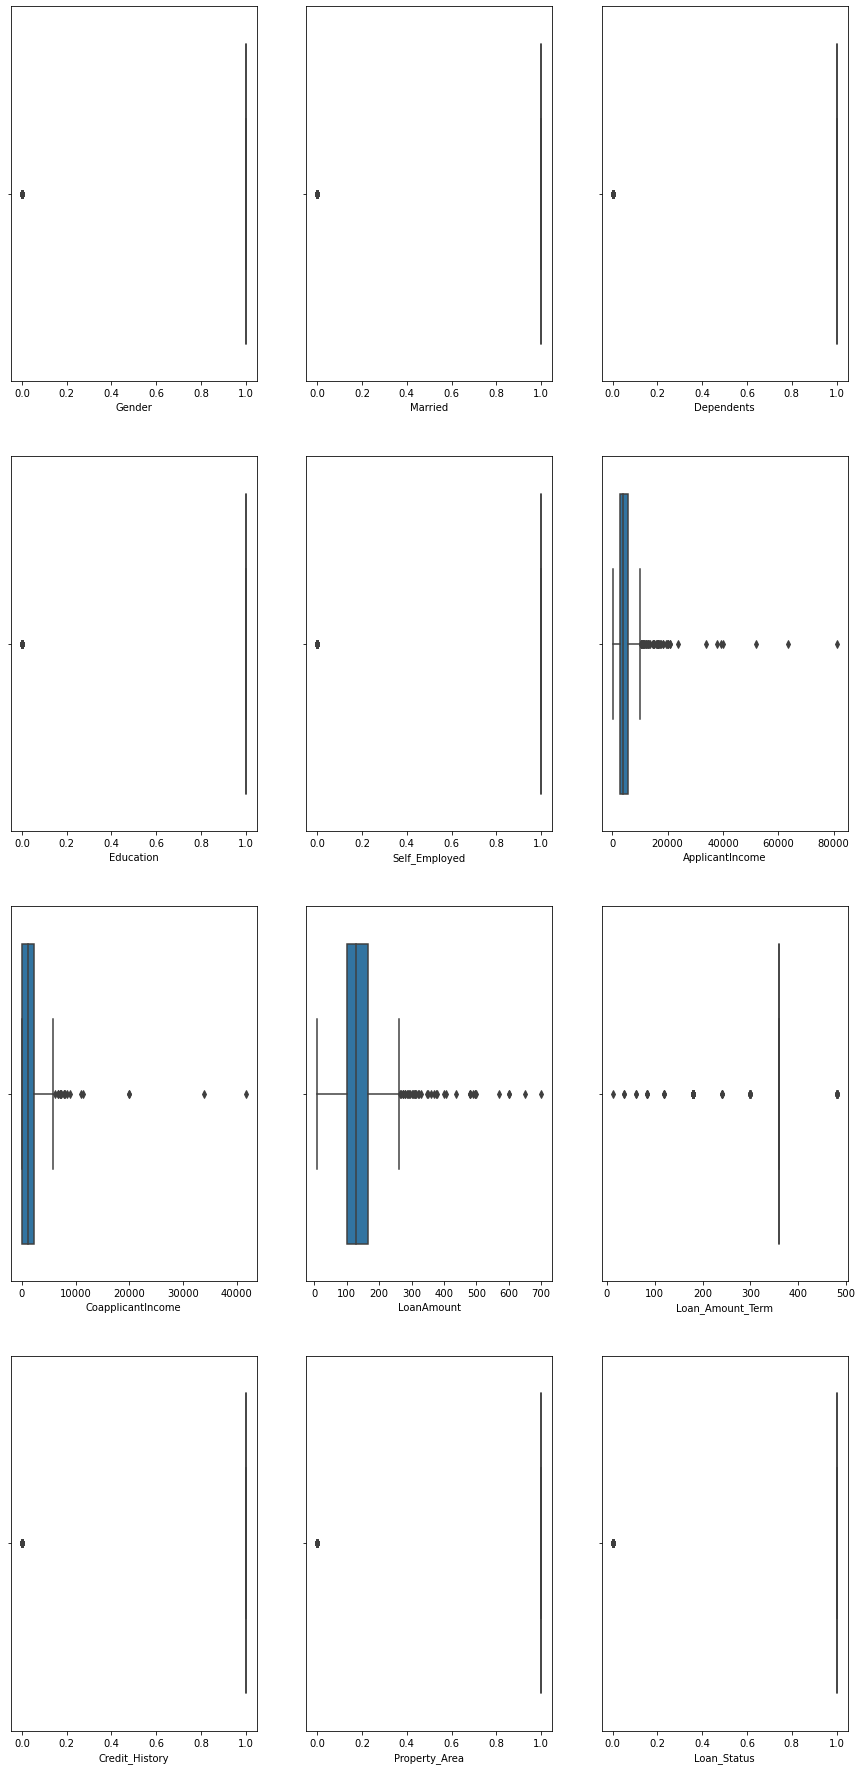

In [39]:
#Visualize the outliers using boxplot
plt.figure(figsize=(15,40))
graph=1
for column in data:
    if graph<=15:
        ax=plt.subplot(5,3,graph)
        ax=sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()  

In [40]:
#Basic Quantile method to remove outliers 
q=data['ApplicantIncome'].quantile(.98)
#we remove top 2% outliers from ApplicantIncome column
clean_data=data[data['ApplicantIncome']<q]
#we remove top 2% data of CoapplicantIncome to remove outliers
q=clean_data['CoapplicantIncome'].quantile(.98)
clean_data=clean_data[clean_data['CoapplicantIncome']<q]
#remove 1% outliers in Loan Amount data
q=clean_data['LoanAmount'].quantile(.99)
clean_data=clean_data[clean_data['LoanAmount']<q]

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

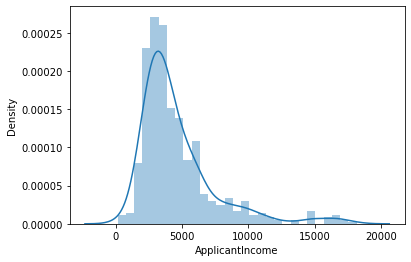

In [41]:
#visualization data distribution after removing outliers
sns.distplot(clean_data['ApplicantIncome'])

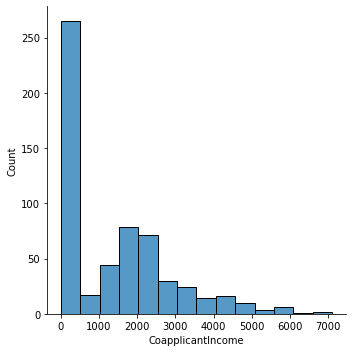

In [42]:
#distribution plot after removing ouliers in CoapplicantIncome column
sns.displot(clean_data['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

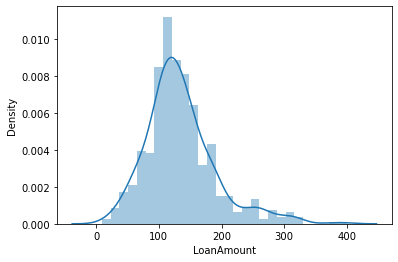

In [43]:
#data distribution after removing outliers in LoanAmount column
sns.distplot(clean_data['LoanAmount'])

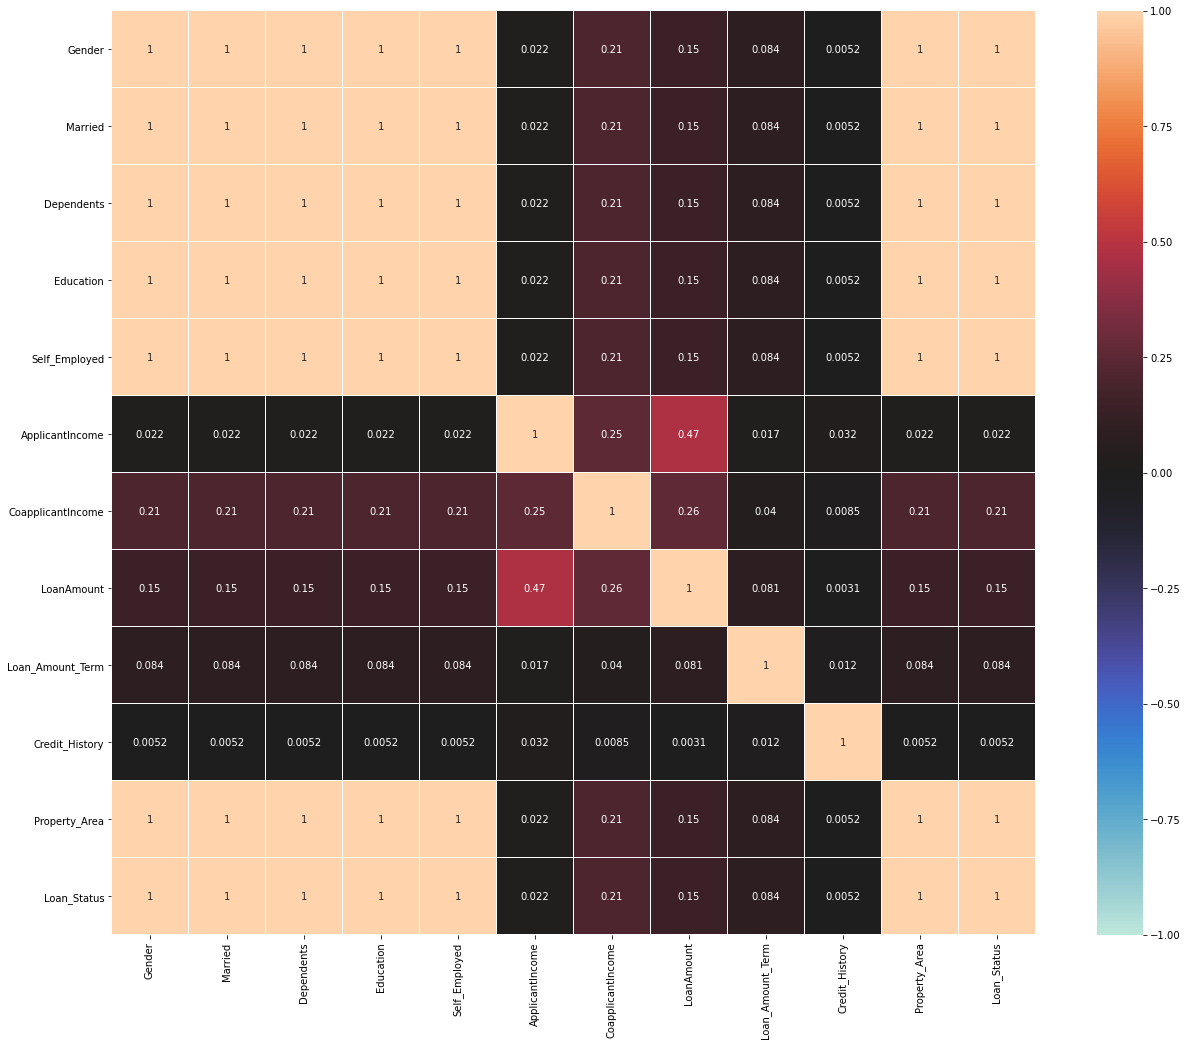

In [44]:
#Plotting Heatmap(Correlation matrix) to check multicollinearity between features
df_corr=clean_data.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

As we see here many column have high number chances are multicollinearity lets check it out with scatter plot

<AxesSubplot:xlabel='Gender', ylabel='Married'>

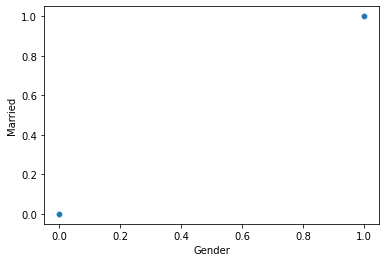

In [45]:
sns.scatterplot(x='Gender',y='Married', data=clean_data)

<AxesSubplot:xlabel='Married', ylabel='Dependents'>

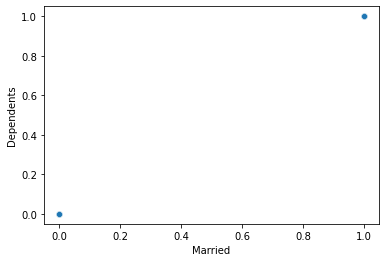

In [46]:
sns.scatterplot(x='Married',y='Dependents',data=clean_data)

<AxesSubplot:xlabel='Education', ylabel='Self_Employed'>

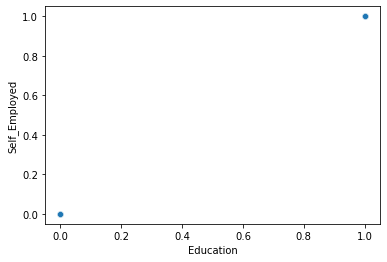

In [48]:
sns.scatterplot(x='Education',y='Self_Employed',data=clean_data)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

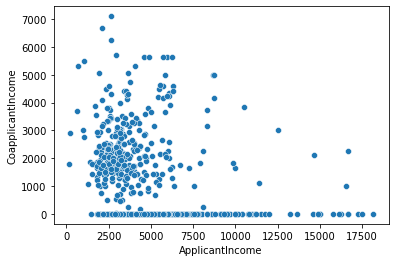

In [49]:
sns.scatterplot(x='ApplicantIncome',y='CoapplicantIncome',data=clean_data)

no multicollinearity between applicantincome and coapplicantincome features

<AxesSubplot:xlabel='Property_Area', ylabel='Self_Employed'>

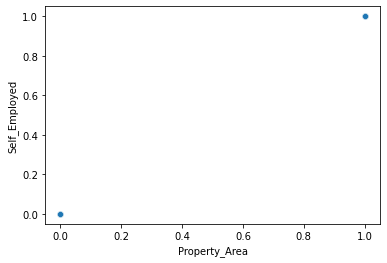

In [50]:
sns.scatterplot(x='Property_Area',y='Self_Employed',data=clean_data)

No multicollinearity in propetry_area, and Eslf_Employed

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

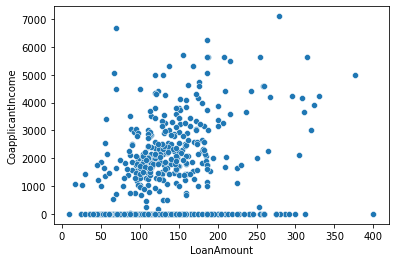

In [51]:
sns.scatterplot(x='LoanAmount',y='CoapplicantIncome',data=clean_data)

no multicollinearity between CoapplicantIcome and LoandAmount 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

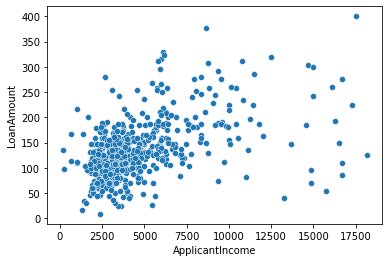

In [52]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=clean_data)

no multicollinearity between ApplicantIncome and LoanAmount 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

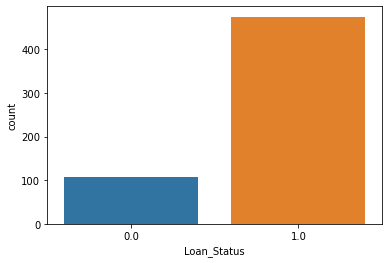

In [53]:
#Traget Variable ,checking class is balnced or not
sns.countplot(x='Loan_Status',data=clean_data)

# Seprate  dataset into Features and class 

In [54]:
Y=clean_data.Loan_Status
X=clean_data.drop(columns=['Loan_Status'],axis=1)

In [55]:
#split data into train test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.7,stratify=Y)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.7)

In [57]:
from sklearn.utils import resample

In [58]:
#concat the training data
x=pd.concat([x_train,y_train],axis=1)

In [59]:
Yes=x[x.Loan_Status==1]
No=x[x.Loan_Status==0]

In [60]:
#upsamling minority
sampled=resample(No,replace=True, #sample with replacement
                   n_samples=len(Yes), #match number is majority class
                    random_state=27) #reproduciable result

In [61]:
#combine majority and upsamled minority
upsample =pd.concat([sampled,Yes])

In [62]:
#check new class counts after upsampling
upsample.Loan_Status.value_counts()

1.0    332
0.0    332
Name: Loan_Status, dtype: int64

In [63]:
#Scale the feature data and train test split
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaler,Y,test_size=0.25,random_state=12)

So its classification problem that to build model whether Loan is approved or not

# LOgisticRegression Model

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [66]:
y_pred=Lr.predict(x_test)

In [67]:
Lr.score(x_test,y_test)

1.0

In [68]:
Lr.score(x_train,y_train)

1.0

model giving high accuracy might have chances of overfitting we will do crossvalidation

In [69]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00       118

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

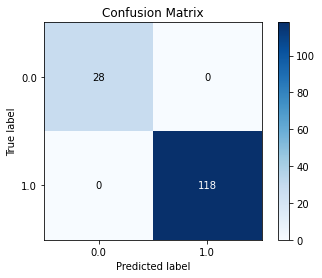

In [111]:
#print confusion matrix to check True postive and True negative and Type 1 error and type 2 error 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
cross_val_score(Lr,X_scaler,Y,cv=5).mean()

1.0

# DecesionTresClassifier model

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
#Model accuracy
y_pred=dt.predict(x_test)
print(accuracy_score(y_pred,y_test))

1.0


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

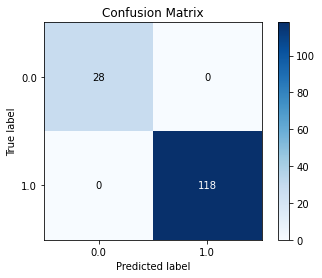

In [110]:
#print confusion matrix to check True postive and True negative and Type 1 error and type 2 error 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [76]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00       118

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



In [77]:
#cross validation of model
cross_val_score(dt,X_scaler,Y,cv=5).mean()

1.0

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [79]:
#model accuracy
y_pred=rfc.predict(x_test)
print(accuracy_score(y_pred,y_test))

1.0


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

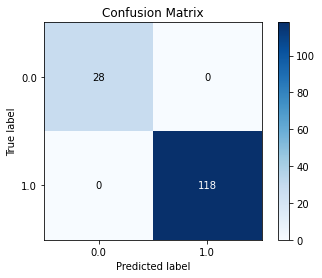

In [109]:
#print confusion matrix to check True postive and True negative and Type 1 error and type 2 error 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [81]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00       118

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



In [82]:
#cross validation of model
cross_val_score(rfc,X_scaler,Y,cv=5).mean()

1.0

# KNeighborsClassifier model

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [85]:
#model accuracy
y_pred=knn.predict(x_test)
print(accuracy_score(y_pred,y_test))

1.0


[[ 28   0]
 [  0 118]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

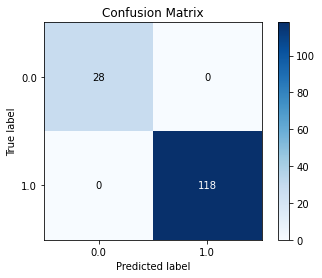

In [108]:
#print confusion matrix to check True postive and True negative and Type 1 error and type 2 error 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [87]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00       118

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



In [88]:
#Cross_validation of KNN model
cross_val_score(knn,X_scaler,Y,cv=5).mean()

1.0

model score and cross_val_score is match so model is accurate no overfitting issue

# RandomForestClassifier Model

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
#model accuracy
y_pred=RFC.predict(x_test)
print(accuracy_score(y_pred,y_test))

1.0


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

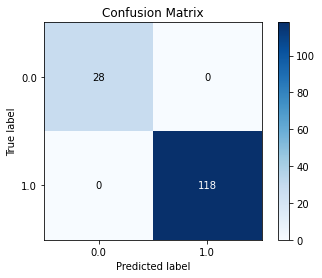

In [112]:
#print confusion matrix to check True postive and True negative and Type 1 error and type 2 error 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [93]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00       118

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



In [94]:
#Cross_validation of KNN model
cross_val_score(RFC,X_scaler,Y,cv=5).mean()

1.0

model score and cross_val_score is match so model is accurate no overfitting issue

# AdaBoostClassifier Model

In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)

AdaBoostClassifier()

In [100]:
#model accuracy
y_pred=Ada.predict(x_test)
print(accuracy_score(y_pred,y_test))

1.0


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

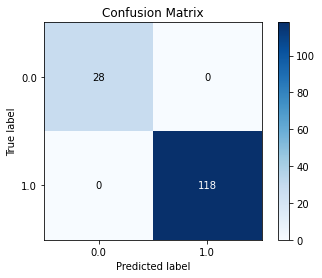

In [113]:
#print confusion matrix to check True postive and True negative and Type 1 error and type 2 error 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [102]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00       118

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



In [103]:
#Cross_validation of KNN model
cross_val_score(Ada,X_scaler,Y,cv=5).mean()

1.0

model score and cross_val_score is match so model is accurate no overfitting issue

In [95]:
#plot auc roc curve to choose best model
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

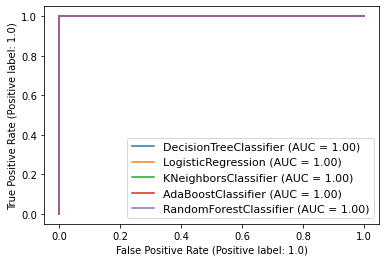

In [104]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(Lr,x_test,y_test, ax=disp.ax_) #ax_ is axis with confusion matrix  ,it is way that combine other confusion mt
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(Ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(RFC,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [105]:
#all model are 100% accurate but here i am saving RandomForestClassifier model after aur_roc plot
#saving model 
import pickle
filename='finalized_model.pickel'
pickle.dump(RFC, open(filename,'wb'))